In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy as sp
from scipy.stats import multivariate_normal


First we define some helper functions
* sample(mu,cov,N)
* plotGaussContour(mu,cov,color,xmin,xmax,ymin,ymax)

In [2]:
def sample(mu,cov,N):
    """sample N data points from a 2-dim Gaussian that is specified by mu, cov"""
    U, S, V = np.linalg.svd(cov)
    X = np.dot(U*np.sqrt(S), np.random.randn(2,N)).T + np.tile(mu,(N,1))
    return X
#-------------------------------------------------------------------------------
def plotGaussContour(mu,cov,color,xmin,xmax,ymin,ymax):
    """create a contour-plot for a 2-dim Gaussian with specified parameters"""
    delta = 0.025
    stdev = np.sqrt(cov)	# make sure that stdev is positive definite
    
    X, Y = np.mgrid[xmin:xmax:delta, ymin:ymax:delta]
    pos = np.dstack((X, Y))
                    
    #scipy.stats.multivariate_normal(mu, cov)
    Z = sp.stats.multivariate_normal(mu, cov)

    plt.plot([mu[0]],[mu[1]],'r+') # plot the mean as a single point
    plt.gca().set_aspect("equal")
    CS = plt.contour(X, Y, Z.pdf(pos),3,colors=color)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Bivariate Normal Distribution')
    
    return;

# Bivariate Gaussians
In this example we show how the shape of a 2-dim Gaussian depends on its covaricance-matrix
* First we specify the number of samples N, and its mean mu
* Then there are three cases to choose from:
  * spherical COV
  * elliptical COV
  * general COV

In [3]:
N = 200 # specify sample size

mu = np.array([3, 2]) # mean of bivariate normal distribution

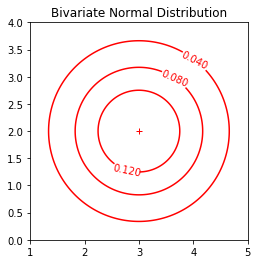

In [4]:
# spherical COV
cov = np.eye(2) # 2 x 2 identity matrix

xmin=1
ymin=0
xmax=5
ymax=4
color='r'
plotGaussContour(mu, cov,color,xmin,xmax,ymin,ymax)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()
stdev = np.sqrt(cov)


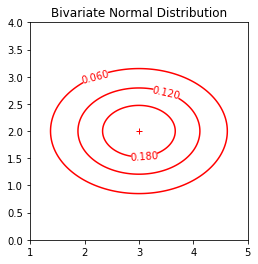

In [5]:
#elliptical COV
cov = np.array([[1, 0],[0, 0.5]]) # diagonal matrix but with different entries in diagonal

xmin=1
ymin=0
xmax=5
ymax=4
color='r'
plotGaussContour(mu, cov,color,xmin,xmax,ymin,ymax)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()
stdev = np.sqrt(cov)


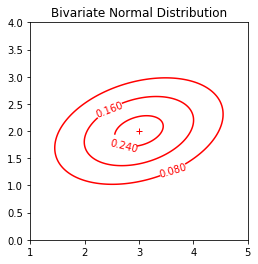

In [6]:
# general COV
cov = np.array([[1, 0.2],[0.2, 0.4]]) # arbitrary matrix, not diagonal (but positive definite!)

X = sample(mu,cov,100)

xmin=1
ymin=0
xmax=5
ymax=4
color='r'
plotGaussContour(mu, cov,color,xmin,xmax,ymin,ymax)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()
stdev = np.sqrt(cov)


# Sampling
Next we sample from the bivariate Gaussian and plot all N samples

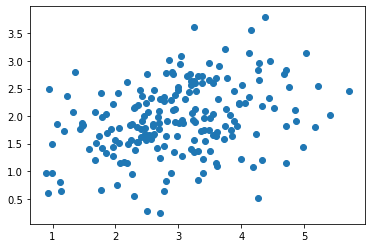

In [7]:
X = sample(mu,cov,N)
plt.scatter(X[:,0],X[:,1])
plt.show()

# Parameter Estimation
We also estimate the ML-Solution fot the bivariate Gaussian 

In [8]:
mu_hat = X.mean(axis=0)
cov_hat = np.cov(X.T)

# Plot contours
Finally, we overlay the contour plots over the samples. There are two plots:
* True Distribution, which we sample from (black),
* Estimated Distribution (red).
Note the slight difference that can be explained by the limited sample size

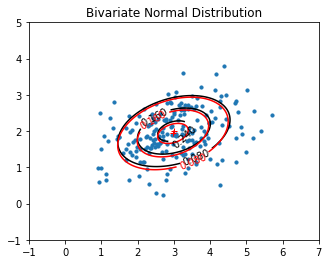

In [9]:
xmin=-1
ymin=-1
xmax=7
ymax=5
plotGaussContour(mu, cov,'k',xmin,xmax,ymin,ymax)
plotGaussContour(mu_hat,cov_hat,'r',xmin,xmax,ymin,ymax)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.scatter(X[:,0],X[:,1],s=10)
plt.show()